1. 텍스트 스크래핑

In [ ]:
pip install youtube_transcript_api

In [ ]:
pip install pytube

     |████████████████████████████████| 51kB 3.3MB/s 


In [ ]:
import os
import subprocess
import pytube
import re
import requests

import json
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:

data2 = []

In [ ]:
url = "https://www.youtube.com/watch?v=M5A78YO0WaY"
yt = pytube.YouTube(url)
stream = yt.streams.first()

pat = re.compile("(v=)([a-zA-Z0-9-_]{11})")
video_id = pat.search(url).group(2)

#parent_dir = dir_path + dir_name + '/'
#print(parent_dir)
data = YouTubeTranscriptApi.get_transcript(video_id,languages = {'ko'})
for line in data:
  data2.append(line['text'])
len(data2)

741

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data2 = pd.DataFrame(data2)
data2

,0
0,아... 뭔 주말에 배수로 작업이냐
1,존X 빡치게...
2,아... 죄송합니다
3,가위바위보 이겼어야 됐는데
4,아니 우리 부대는 왜 이렇게\n가위바위보를 잘하는 새X가 없어?
...,...
736,니들 뭐야!
737,어...
738,아....
739,체력 단련...


In [ ]:
data2.to_csv('/content/drive/MyDrive/aa/장삐쭈stt.csv',encoding='utf-8-sig')

In [ ]:
import re

text = []
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자

for i in data2:
  s = i.split(',')[0].replace("'text': '","")[:-1]
  text.append(hangul.sub('',s))
text

['아 뭔 주말에 배수로 작업이',
 '존 빡치게',
 '아 죄송합니',
 '가위바위보 이겼어야 됐는',
 '아니 우리 부대는 왜 이렇게가위바위보를 잘하는 새가 없어',
 '뭐 했다 하면 다 우리야 시',
 '죄송합니다다음엔 이겨보겠습니',
 '야 박민',
 '일병 박민',
 '담배 있냐',
 '아 저 담배 끊었습니',
 '뭐 언제부터',
 '아 체력도 떨어지고 해서일주일 전부터 끊었습니',
 '네가 시 떨어질 체력이 어딨어 새야',
 '아 있습니다',
 '야 안 펴도 내일부터 한 갑씩은 가지고 다',
 '알았어',
 '',
 '야 임다',
 '일병 임다',
 '팔 괜찮냐',
 '예 괜찮습니',
 '근데 왜 이렇게 삽질이 시원치 않아',
 '팍팍 해 새야 팍팍',
 '빨리 끝내고 가게',
 '예 알겠습니',
 '최일구 상병님담배 좀 드립니까',
 '아 네 꺼 맨솔이잖',
 '그럼 뭐안 드려도 됩니까',
 '아 아냐 한 대 줘',
 '여깄습니',
 '야 임다혜',
 '일병 임다',
 '잘 보고 있다가누구 오면 바로 말해',
 '예 알겠습니',
 '아이씨 또 지이',
 '거 물 묻은 거 아닙니까',
 '어',
 '최일구 상병',
 '사람 옵니',
 '어 누군데',
 '어',
 '소대장님인 것 같습니',
 '아니 그 양반이 왜 와 또귀찮',
 '그만하고 들어오라는 거 아닙니까',
 '그럴 거면 병사를 보내지저 양반이 오겠냐 새야',
 '최일구 상병',
 '배수로 작전은 잘 진행되고 있나',
 '예 잘 되고 있습니다',
 '왜 오셨습니까',
 '행보관이 인솔자로 가보면 어떻겠냐고제안을 해서 오게 됐',
 '제안이 아니라 명령입니다 그거',
 '배수로 작전 진행 상황보고할 수 있도',
 '일단 테니스장 앞쪽으로 해가지고초소 뒤까지는 대충 끝났',
 '이제 여기만 하면 끝입니',
 '그래내가 확인해봐도 되겠나',
 '예예 해보십',
 '아니 줄자는 왜',
 '음',
 '센치',
 '센치가 부족한데',
 '아니 대충 삽으로 그냥 파는 거',
 '누가 그런 걸 재면서 작업합

**2. 노이즈 캔슬링**

In [ ]:
!git clone https://github.com/ssut/py-hanspell.git # 네이버 맞춤법 검사기

fatal: destination path 'py-hanspell' already exists and is not an empty directory.


In [ ]:
cd py-hanspell/

/content/py-hanspell


In [ ]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing py_hanspell.egg-info/PKG-INFO
writing dependency_links to py_hanspell.egg-info/dependency_links.txt
writing requirements to py_hanspell.egg-info/requires.txt
writing top-level names to py_hanspell.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'py_hanspell.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/__init__.py -> build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/spell_checker.py -> build/bdist.linux-x86_64/egg/hanspell
copying build/lib/hanspell/response.py -> bui

In [ ]:
from hanspell import spell_checker

text2 = []
for i in text:
  result = spell_checker.check(i)
  text2.append(result.checked)
text2

['아 뭔 주말에 배수로 작업이',
 '존 화나게',
 '아 죄송합니',
 '가위바위보이겼어야 됐는',
 '아니 우리 부대는 왜 이렇게 가위바위보를 잘하는 새가 없어',
 '뭐 했다 하면 다 우리야 시',
 '죄송합니다 다음엔 이겨보겠습니',
 '야 박민',
 '일병 박민',
 '담배 있냐',
 '아 저 담배 끊어습니',
 '뭐 언제부터',
 '아 체력도 떨어지고 해서 일주일 전부터 끊어습니',
 '네가 시 떨어질 체력이 어딨어 새야',
 '아 있습니다',
 '야 안 펴도 내일부터 한 갑씩은 가지고 다',
 '알았어',
 '',
 '야임다',
 '일병임다',
 '팔 괜찮냐',
 '예 괜찮습니',
 '근데 왜 이렇게 삽질이 시원치 않아',
 '팍팍해 새야 팍팍',
 '빨리 끝내고 가게',
 '예 알겠습니',
 '최일구 상병님 담배 좀 드립니까',
 '아 네 꺼 맨솔이잖',
 '그럼 뭐 안 드려도 됩니까',
 '아 아냐 한 대 줘',
 '여깄습니',
 '야 김다혜',
 '일병임다',
 '잘 보고 있다가 누구 오면 바로 말해',
 '예 알겠습니',
 '아이씨 또 지이',
 '거 물 묻은 거 아닙니까',
 '어',
 '최일구 상병',
 '사람 옵니',
 '어 누군데',
 '어',
 '소대장님인 것 같습니',
 '아니 그 양반이 왜 와 또 귀차',
 '그만하고 들어오라는 거 아닙니까',
 '그럴 거면 병사를 보내지 저 양반이 오겠냐 새야',
 '최일구 상병',
 '배수로 작전은 잘 진행되고 있나',
 '예 잘 되고 있습니다',
 '왜 오셨습니까',
 '행보관이 인솔자로 가보면 어떻겠냐고 제안을 해서 오게 됐',
 '제안이 아니라 명령입니다 그거',
 '배수로 작전 진행 상황 보고할 수 있도',
 '일단 테니스장 앞쪽으로 해가지고 초소 뒤까지는 대충 끝나',
 '이제 여기만 하면 끝입니',
 '그래 내가 확인해봐도 되겠나',
 '예예 해보신',
 '아니 줄자는 왜',
 '음',
 '센티',
 '센티가 부족한데',
 '아니 대충 삽으로 그냥 파는 거',
 '누가 그런 걸 

**3. 토크나이징**
**4. 어휘 분석**

In [ ]:
! pip install konlpy wordcloud

In [ ]:
import konlpy
from konlpy.tag import Kkma, Okt, Hannanum, Komoran

In [ ]:
kkma = Kkma()
okt = Okt()
hannanum = Hannanum()
komoran = Komoran()

In [ ]:
exp = text2[1]
print(exp)
print(kkma.morphs(exp))
print(okt.morphs(exp))
print(hannanum.morphs(exp)) # 선택!!
print(komoran.morphs(exp))

존 화나게
['존', '화나', '게']
['존', '화나게']
['졸', 'ㄴ', '화나', '게']
['존', '화나', '게']


In [ ]:
# 품사 태깅
exp = text2[1]
print(exp)
print(kkma.pos(exp))
print(okt.pos(exp))
print(hannanum.pos(exp))
print(komoran.pos(exp))

존 화나게
[('존', 'NNP'), ('화나', 'VV'), ('게', 'ECD')]
[('존', 'Noun'), ('화나게', 'Verb')]
[('졸', 'P'), ('ㄴ', 'E'), ('화나', 'P'), ('게', 'E')]
[('존', 'NNP'), ('화나', 'VV'), ('게', 'EC')]


5. 불용어 처리

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

6. 텍스트 벡터화

In [ ]:
#word2vec
vec = []
for i in range(len(text2)):
    vec2 = []
    tm_ls = hannanum.nouns(text2[i])
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(vec, min_count=1,window=3,iter=20, size=100, sg=1) #skip-gram

**wordcloud**

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumGothic Eco


In [ ]:
noun_list = []
for i in vec:
  for j in i:
    noun_list.append(j)

In [ ]:
from collections import Counter

# 빈도수 계산
count = Counter(noun_list)

# 상위 50건 추출
most = count.most_common(50)

# 딕셔너리 구성
tags = {}
for n, c in most:
  tags[n] = c

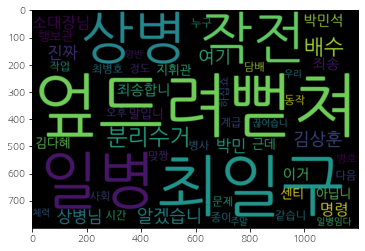

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path="NanumGothic", width=600, height=400,
               scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(tags)
plt.figure()
plt.imshow(gen, interpolation='bilinear')

token 군집화 (kmeans)

In [ ]:
print(model.wv.syn0.shape) #w2v size  -> 14개의 단어가 100차원을 가지고 있음

#14개의 단어가 100차원으로 벡터화된 수치를 넣어줌
word_vectors = model.wv.syn0 # model.wv.vectors와 같은 값을 가짐

(250, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


In [ ]:
!pip3 install KMeans

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 4 #cluster의 갯수 산정
kmeans_clustering = KMeans( n_clusters = num_clusters )#default

In [ ]:
idx = kmeans_clustering.fit_predict( word_vectors ) #각 단어가 어떤 군집에 속하는지 확인
idx

array([1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 3, 2, 0, 2, 0, 0, 3, 1, 1, 0,
       2, 3, 1, 2, 0, 3, 1, 2, 1, 2, 1, 0, 3, 0, 2, 3, 2, 3, 2, 1, 1, 2,
       2, 0, 0, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1, 3, 1, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 3, 3, 0, 2, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2,
       2, 2, 0, 1, 1, 3, 1, 3, 3, 3, 1, 2, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 3, 3, 2, 1, 0, 1, 3, 1, 0, 1, 2, 0, 0, 0, 1, 2, 3, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 3, 2, 0, 1, 2, 3, 1,
       3, 1, 0, 1, 2, 1, 0, 3, 2, 0, 2, 0, 3, 2, 1, 0, 0, 1, 0, 3, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 1, 2, 1, 3, 3, 2, 0, 2,
       2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 3, 3, 1, 0, 1, 0, 0, 1, 0,
       3, 1, 2, 1, 0, 0, 0, 3, 2, 1, 2, 2, 2, 0, 0, 1, 2, 3, 2, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word #학습된 단어들 unique
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}#각 단어 별로 클러스터 번호에 매칭
word_centroid_map

{'ㅋㅋ': 2,
 'ㅎ허': 2,
 '가게': 1,
 '가보셨습니': 2,
 '가위바위보': 0,
 '가위바위보이겼어야': 2,
 '가정': 2,
 '가지': 3,
 '같습니': 1,
 '개털니': 0,
 '거기': 0,
 '거지': 0,
 '건가': 0,
 '경우': 1,
 '계급': 3,
 '계급장': 0,
 '계속': 1,
 '곡괭이': 1,
 '관심': 3,
 '괜찮습니': 0,
 '교육': 2,
 '군기': 0,
 '군대': 0,
 '군인전': 2,
 '군장': 2,
 '귀차': 3,
 '그거': 2,
 '그렇습니': 3,
 '그만하십쇼': 3,
 '그박민석': 3,
 '근데': 1,
 '김다혜': 1,
 '김상훈': 2,
 '껍질': 1,
 '끊어습니': 0,
 '끝났다': 2,
 '끝냈겠습니': 2,
 '끝입니': 0,
 '내일': 2,
 '누구': 2,
 '누군데': 1,
 '다녀왔습니': 3,
 '다들': 3,
 '다음': 3,
 '다음부턴': 2,
 '다행': 2,
 '담당': 0,
 '담배': 1,
 '당장': 3,
 '대답': 1,
 '대답해': 0,
 '대첩': 3,
 '동안': 2,
 '동작': 2,
 '되잔': 2,
 '뜰래': 2,
 '마무리': 0,
 '마지막': 1,
 '만큼': 0,
 '말입니': 3,
 '말했잖': 1,
 '맞습니': 2,
 '맞짱': 1,
 '매일매일': 1,
 '맨솔이잖': 3,
 '먹을래': 1,
 '명령': 0,
 '명령한': 0,
 '모르겠습니': 2,
 '모아놔야': 0,
 '모양': 2,
 '무시해도': 1,
 '문제': 1,
 '문젠데': 1,
 '물자창고': 3,
 '뭡니까': 3,
 '밑바닥': 3,
 '박민': 2,
 '박민석': 0,
 '배수': 0,
 '배수용': 1,
 '변수': 0,
 '병사': 2,
 '병사들': 1,
 '병장님': 3,
 '병호': 2,
 '병호야': 0,
 '보이': 2,
 '봤습니': 3,
 '부대': 3,
 '부족': 2,
 '부족한데': 2,
 '분류':

In [ ]:
for cluster in range(num_clusters):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))
    
    # 클러스터번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))): #list(dict)키 값만 리스트로 반환
        #list(dict.values)는 value값이 리스트로 반환
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


Cluster 0
['상병', '작전', '배수', '여기', '명령', '죄송', '박민석', '행보관', '작업', '정도', '하십쇼', '우리', '끊어습니', '일병임다', '마무리', '거지', '담당', '사건', '완전', '군대', '분명', '이병', '샤워', '플라스틱', '계급장', '가위바위보', '일주일', '괜찮습니', '상황', '일단', '앞쪽', '초소', '끝입니', '확인', '파이프', '만큼', '작년', '스무', '했습니', '지금', '변수', '훈련', '평생', '통제', '건가', '명령한', '진행하시', '죽겠습니', '징계위원회', '소집', '은젠데', '거기', '군기', '삽시간', '중대', '소대장', '중대장', '개털니', '이틀째', '않았', '병호야', '아이스크림', '십시', '이후', '없었습니', '대답해', '오전', '빼놔', '특이한', '프링글스', '전쟁', '이쪽', '모아놔야', '재밌으']

Cluster 1
['엎드려뻗쳐', '최일구', '상병님', '근데', '김다혜', '지휘관', '담배', '같습니', '문제', '종이', '맞짱', '자존심', '마지막', '일병님', '생활', '잘하겠습니', '삽질', '시원치', '가게', '지이', '누군데', '인솔자', '배수용', '어딨지', '실패', '중요', '이것', '크긴', '무시해도', '십쇼', '올라가겠습니', '핰ㅋㅋ', '곡괭이', '계속', '오성진', '실제', '대답', '중이', '시작', '시작했습니', '문젠데', '저도', '병사들', '매일매일', '연병장', '지렸', '음료수', '먹을래', '연락', '분류', '껍질', '말했잖', '경우', '잘못']

Cluster 2
['일병', '분리수거', '알겠습니', '김상훈', '박민', '소대장님', '죄송합니', '센티', '아닙니', '누구', '병사', '동작', '병호', '최병호', '사회', '주말', '체력

LDA - gensim

In [ ]:
import pandas as pd
doc = pd.DataFrame({'tokens':vec})
tokenized_doc = doc['tokens']
tokenized_doc

0         [주말, 배수, 작업]
1               [죄송합니]
2          [가위바위보이겼어야]
3      [우리, 부대, 가위바위보]
4                 [우리]
            ...       
233               [죄송]
234         [이거, 분리수거]
235     [유리, 이쪽, 모아놔야]
236              [일어나]
237          [ㅋㅋ, 재밌으]
Name: tokens, Length: 238, dtype: object

In [ ]:
#단어 정수 인코딩&빈도수
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[0])  #첫번째 doc에서의 각 단어 빈도수

[(0, 1), (1, 1), (2, 1)]


In [ ]:
len(dictionary)

250

In [ ]:
import gensim

NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)
for topic in ldamodel.print_topics():
    print(topic)


(0, '0.021*"문제" + 0.021*"배수" + 0.021*"맞짱" + 0.015*"센티" + 0.015*"다음" + 0.015*"오후" + 0.015*"정도" + 0.015*"분명" + 0.015*"전시상황" + 0.015*"한번"')
(1, '0.065*"엎드려뻗쳐" + 0.043*"분리수거" + 0.036*"김상훈" + 0.031*"이거" + 0.025*"아닙니" + 0.019*"행보관" + 0.019*"근데" + 0.019*"병호" + 0.019*"상병님" + 0.013*"병사"')
(2, '0.062*"최일구" + 0.056*"일병" + 0.045*"상병" + 0.036*"박민" + 0.026*"소대장님" + 0.026*"박민석" + 0.026*"죄송합니" + 0.021*"죄송" + 0.021*"김다혜" + 0.017*"엎드려뻗쳐"')
(3, '0.041*"작전" + 0.041*"알겠습니" + 0.041*"여기" + 0.026*"배수" + 0.025*"명령" + 0.021*"진짜" + 0.016*"하십쇼" + 0.016*"동작" + 0.016*"종이" + 0.011*"김상훈"')


In [ ]:
#문서별 토픽 분포
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==15:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.06602376), (1, 0.064245865), (2, 0.06253956), (3, 0.80719084)]
1 번째 문서의 topic 비율은 [(0, 0.12503755), (1, 0.12504545), (2, 0.62488806), (3, 0.12502891)]
2 번째 문서의 topic 비율은 [(0, 0.12522468), (1, 0.12520282), (2, 0.62440115), (3, 0.12517133)]
3 번째 문서의 topic 비율은 [(0, 0.06449688), (1, 0.062586166), (2, 0.062572844), (3, 0.8103441)]
4 번째 문서의 topic 비율은 [(0, 0.61431515), (1, 0.125158), (2, 0.12513344), (3, 0.13539341)]
5 번째 문서의 topic 비율은 [(0, 0.80390525), (1, 0.06255438), (2, 0.07056782), (3, 0.062972486)]
6 번째 문서의 topic 비율은 [(0, 0.12503518), (1, 0.12502404), (2, 0.62492067), (3, 0.12502016)]
7 번째 문서의 topic 비율은 [(0, 0.0833567), (1, 0.083345555), (2, 0.7499545), (3, 0.08334318)]
8 번째 문서의 topic 비율은 [(0, 0.12510009), (1, 0.13100632), (2, 0.61881703), (3, 0.12507659)]
9 번째 문서의 topic 비율은 [(0, 0.083415344), (1, 0.74224234), (2, 0.09094623), (3, 0.083396085)]
10 번째 문서의 topic 비율은 [(0, 0.06256587), (1, 0.8111299), (2, 0.06255037), (3, 0.063753866)]
11 번째 문서의 topic 비율은 [(0, 0.08

In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:15]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.8071,"[(0, 0.06607638), (1, 0.06424655), (2, 0.06253..."
1,1,2.0,0.6249,"[(0, 0.12503757), (1, 0.12504545), (2, 0.62488..."
2,2,2.0,0.6244,"[(0, 0.1252249), (1, 0.12520356), (2, 0.624399..."
3,3,3.0,0.8104,"[(0, 0.06448463), (1, 0.06258615), (2, 0.06257..."
4,4,0.0,0.6142,"[(0, 0.61419463), (1, 0.1251581), (2, 0.125133..."
5,5,0.0,0.8038,"[(0, 0.8037799), (1, 0.062554404), (2, 0.07069..."
6,6,2.0,0.6249,"[(0, 0.12503517), (1, 0.12502402), (2, 0.62492..."
7,7,2.0,0.7500,"[(0, 0.0833567), (1, 0.083345555), (2, 0.74995..."
8,8,2.0,0.6188,"[(0, 0.12510014), (1, 0.13104796), (2, 0.61877..."
9,9,1.0,0.7423,"[(0, 0.08341532), (1, 0.74233323), (2, 0.09085..."


In [ ]:
pip install pyLDAvis

LDA - sklearn

In [ ]:
tt = pd.DataFrame({'tokens':vec})
#역토큰화 필요
tokenized_doc = tt['tokens']
detokenized_doc = []
for i in range(len(tt)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
tt['tokens'] = detokenized_doc
tt

,tokens
0,주말 배수 작업
1,죄송합니
2,가위바위보이겼어야
3,우리 부대 가위바위보
4,우리
...,...
233,죄송
234,이거 분리수거
235,유리 이쪽 모아놔야
236,일어나


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(tt['tokens'])
X.shape # TF-IDF 행렬의 크기 확인

(238, 250)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=4,learning_method='online',random_state=777,max_iter=1)
lda_model.fit_transform(X) #토픽별 단어들 분포

array([[0.09673172, 0.09778151, 0.09968619, 0.70580058],
       [0.12599828, 0.12690475, 0.12716284, 0.61993412],
       [0.13197257, 0.60603491, 0.1314425 , 0.13055002],
       [0.09578953, 0.09847541, 0.09763993, 0.70809513],
       [0.12951426, 0.60590607, 0.13046317, 0.1341165 ],
       [0.09576146, 0.09476379, 0.09617664, 0.71329811],
       [0.12681638, 0.1269206 , 0.12866673, 0.61759629],
       [0.1057765 , 0.11250658, 0.1073725 , 0.67434443],
       [0.13119568, 0.13487735, 0.59946772, 0.13445926],
       [0.10859877, 0.11002268, 0.11151752, 0.66986104],
       [0.09675581, 0.09528104, 0.09639791, 0.71156524],
       [0.10826247, 0.1086479 , 0.10947755, 0.67361208],
       [0.60624378, 0.1309144 , 0.13205477, 0.13078705],
       [0.12976583, 0.13009901, 0.60919491, 0.13094026],
       [0.1283827 , 0.61299331, 0.12967471, 0.12894928],
       [0.1291096 , 0.13165105, 0.60922346, 0.13001589],
       [0.09557272, 0.71213756, 0.0964633 , 0.09582642],
       [0.13106812, 0.12945002,

In [ ]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.72561901 0.69854883 0.82234513 0.99057699 0.64132717 0.82763633
  0.79009331 0.8929167  0.71569591 0.71532475 1.02613455 1.12935538
  0.78286714 0.88532674 1.11542765 1.3072357  0.82432094 0.75723828
  1.16870866 0.65756511 1.02755631 0.93101077 0.86173467 0.7472601
  0.66237486 0.67416037 0.97245544 0.75539934 0.62812422 0.77846294
  0.78131803 0.72333699 0.92091651 0.98426772 0.80616787 0.73802356
  0.94693849 0.99562042 1.0098609  0.73633123 0.79463556 1.0419298
  1.01134629 0.74102496 0.95892308 1.24603699 1.13984464 0.81404511
  0.79614766 0.69855503 0.93090202 0.86904573 0.7370603  0.71257602
  0.76157895 1.05890516 1.15530128 1.1187159  0.73382992 1.33595274
  0.73895711 0.71980787 1.55416163 0.83160833 0.80325253 0.78722221
  1.1105178  0.82364635 0.75272868 0.76689891 0.91562303 0.59583731
  0.76039956 0.72433137 0.725719   1.03794916 0.9030626  0.77947001
  0.73029342 0.97933618 0.99449877 0.68630015 1.18187499 0.93846633
  0.94851403 0.9792644  1.13357135 0.78905121 0.71

In [ ]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=15):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('최일구', 2.16), ('엎드려뻗쳐', 2.14), ('상병', 2.13), ('여기', 2.06), ('진짜', 1.95), ('최병호', 1.65), ('행보관', 1.57), ('맞짱', 1.55), ('종교', 1.34), ('말입니', 1.34), ('계급장', 1.31), ('이병', 1.28), ('잘하겠습니', 1.26), ('다행', 1.25), ('쓰레기', 1.23)]
Topic 2: [('알겠습니', 2.81), ('일병', 1.99), ('상병님', 1.82), ('박민석', 1.78), ('김상훈', 1.75), ('엎드려뻗쳐', 1.64), ('어디', 1.61), ('명령', 1.51), ('누구', 1.51), ('근데', 1.5), ('일병임다', 1.4), ('병호', 1.36), ('동작', 1.31), ('테니스장', 1.3), ('십시', 1.22)]
Topic 3: [('아닙니', 2.21), ('분리수거', 2.0), ('센티', 1.72), ('그렇습니', 1.57), ('오후', 1.57), ('김다혜', 1.54), ('작전', 1.42), ('군대', 1.38), ('일병님', 1.31), ('김상훈', 1.31), ('핑계', 1.27), ('진행', 1.25), ('지금', 1.22), ('분명', 1.22), ('가지', 1.21)]
Topic 4: [('죄송합니', 2.54), ('박민', 2.42), ('이거', 2.25), ('분리수거', 2.06), ('죄송', 1.83), ('소대장님', 1.83), ('엎드려뻗쳐', 1.6), ('사회', 1.55), ('일병', 1.4), ('끊어습니', 1.34), ('실시', 1.33), ('처음', 1.3), ('주말', 1.26), ('보이', 1.25), ('계급', 1.23)]


In [ ]:
Topic1 = ['최일구', '상병', '행보관', '계급장', '맞짱']                      #선임 관련
Topic2 = ['일병', '박민석', '엎드려뻗쳐', '명령', '동작']                    #낮은계급 관련
Topic3 = ['아닙니', '그렇습니', '군대', '일병님']                            #대화
Topic4 = ['죄송', '분리수거', '실시', '처음', '주말', '사회', '이거']        #군대 일상